Relevant Imports

In [86]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import folium

Reading in Data Frames

In [113]:
# reading in data of average walking times by demographic
allAvgWalkingTime = pd.read_csv('../avgTravelTime/averageWalkingTimeNeighborhoods.csv')
allAvgCyclingTime = pd.read_csv('../avgTravelTime/averageCyclingTimeNeighborhoods.csv')
allAvgDrivingTime = pd.read_csv('../avgTravelTime/averageDrivingTimeNeighborhoods.csv')
demoAvgWalkingTime = pd.read_csv('../avgTravelTime/allDemsWalkingTimes.csv')

# read in data of outlines of neighborhoods -- walking, cycling, and driving neighborhoods
walkingNeighborhoods = pd.read_csv('../avgTravelTime/completedWalkingNeighborhoodRadiiDF.csv')
cyclingNeighborhoods = pd.read_csv('../avgTravelTime/completedCyclingNeighborhoodRadiiDF.csv')
drivingNeighborhoods = pd.read_csv('../avgTravelTime/completedDrivingNeighborhoodRadiiDF.csv')

# read in data of census tracts and Chicago Community areas on which to overlay neighborhoods
chicagoCommunityAreas = pd.read_csv('../avgTravelTime/CommAreas.csv')
populationDemographics = pd.read_csv('../censusTractsSource.csv')
neighborhoodRadii = pd.read_csv('../avgTravelTime/completedWalkingNeighborhoodRadiiDF.csv')

Converting DataFrames to GeoDataFrames

In [88]:
branchLocsOnly=neighborhoodRadii[['BRANCH','LOCATION']]
branchLocsOnly.crs = 'EPSG:4326'
branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
branchLocsOnly = branchLocsOnly.drop(columns='LOCATION')

branchLocsOnly = gpd.GeoDataFrame(
    branchLocsOnly, geometry=gpd.points_from_xy(branchLocsOnly.Longitude, branchLocsOnly.Latitude), crs="EPSG:4326")


censusTracts = populationDemographics[['geoid','geometry','qualifying name', 'current land area (sq. m)', 'current water area (sq. m)', ]]
censusTracts = gpd.GeoDataFrame(
    censusTracts.loc[:, [c for c in censusTracts.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(censusTracts["geometry"]),
    crs="epsg:4326",
    )

combinedCensusTracts = gpd.GeoDataFrame({'BRANCH': ['All Tracts'],'geometry': [censusTracts.loc[0,'geometry']]})
for i in range(censusTracts.shape[0] - 1):    
        oneTract = gpd.GeoDataFrame({'Tract': [censusTracts.loc[i,'geoid']],'geometry': [censusTracts.loc[i+1,'geometry']]})
        combinedCensusTracts = combinedCensusTracts.union(oneTract, align = True)
combinedCensusTracts = combinedCensusTracts.set_crs(4326)

allAvgWalkingTime['geometry'] = walkingNeighborhoods['geometry']
allAvgWalkingTime = gpd.GeoDataFrame(
    allAvgWalkingTime.loc[:, [c for c in allAvgWalkingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(allAvgWalkingTime["geometry"]),
    crs="epsg:4326",
    )

allAvgCyclingTime['geometry'] = cyclingNeighborhoods['geometry']
allAvgCyclingTime = gpd.GeoDataFrame(
    allAvgCyclingTime.loc[:, [c for c in allAvgCyclingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(allAvgCyclingTime["geometry"]),
    crs="epsg:4326",
    )

allAvgDrivingTime['geometry'] = drivingNeighborhoods['geometry']
allAvgDrivingTime = gpd.GeoDataFrame(
    allAvgDrivingTime.loc[:, [c for c in allAvgDrivingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(allAvgDrivingTime["geometry"]),
    crs="epsg:4326",
    )

demoAvgWalkingTime['geometry'] = walkingNeighborhoods['geometry']
demoAvgWalkingTime = gpd.GeoDataFrame(
    demoAvgWalkingTime.loc[:, [c for c in demoAvgWalkingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(demoAvgWalkingTime["geometry"]),
    crs="epsg:4326",
    )

neighborhoodRadii['geometry'] = neighborhoodRadii['geometry']
neighborhoodRadii = gpd.GeoDataFrame(
    neighborhoodRadii.loc[:, [c for c in neighborhoodRadii.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(neighborhoodRadii["geometry"]),
    crs="epsg:4326",
    )

chicagoCommunityAreas=chicagoCommunityAreas.rename(columns={"the_geom": "geometry"})
chicagoCommunityAreas = gpd.GeoDataFrame(
    chicagoCommunityAreas.loc[:, [c for c in chicagoCommunityAreas.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(chicagoCommunityAreas["geometry"]),
    crs="epsg:4326",
    )

walkingNeighborhoods=walkingNeighborhoods.rename(columns={"the_geom": "geometry"})
walkingNeighborhoods = gpd.GeoDataFrame(
    walkingNeighborhoods.loc[:, [c for c in walkingNeighborhoods.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(walkingNeighborhoods["geometry"]),
    crs="epsg:4326",
    )

cyclingNeighborhoods=cyclingNeighborhoods.rename(columns={"the_geom": "geometry"})
cyclingNeighborhoods = gpd.GeoDataFrame(
    cyclingNeighborhoods.loc[:, [c for c in cyclingNeighborhoods.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(cyclingNeighborhoods["geometry"]),
    crs="epsg:4326",
    )

drivingNeighborhoods=drivingNeighborhoods.rename(columns={"the_geom": "geometry"})
drivingNeighborhoods = gpd.GeoDataFrame(
    drivingNeighborhoods.loc[:, [c for c in drivingNeighborhoods.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(drivingNeighborhoods["geometry"]),
    crs="epsg:4326",
    )

/tmp/ipykernel_2697513/2742329315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
/tmp/ipykernel_2697513/2742329315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]


Heat map of average walking time to the nearest library.

Text(0.5, 1.0, 'Average Walking Time to Local Library')

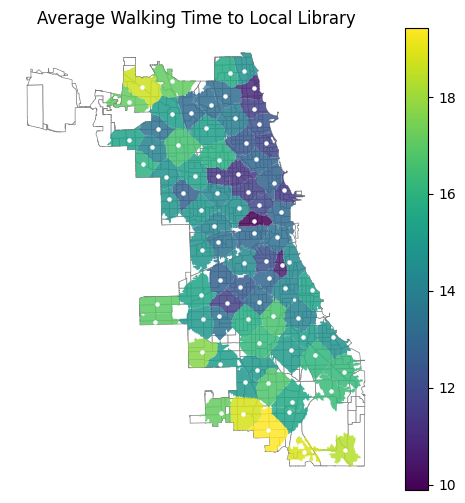

In [89]:
allAvgWalkingTime = gpd.clip(allAvgWalkingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
allAvgWalkingTime.plot(column='Average Walking Time (Minutes)', legend=True, ax=base, alpha = .85)
branchLocsOnly.plot(ax=base, marker='o', color='white', markersize=5)
ax.axis('off')
ax.set_title('Average Walking Time to Local Library', fontdict={'fontsize': '12', 'fontweight' : '3'})

Heat map of average cycling time to the nearest library.

Text(0.5, 1.0, 'Average Cycling Time to Local Library')

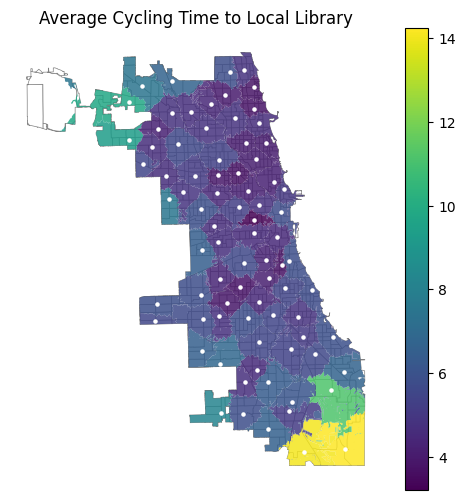

In [90]:
allAvgCyclingTime = gpd.clip(allAvgCyclingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
allAvgCyclingTime.plot(column='Average Cycling Time (Minutes)', legend=True, ax=base, alpha = .85)
branchLocsOnly.plot(ax=base, marker='o', color='white', markersize=5)
ax.axis('off')
ax.set_title('Average Cycling Time to Local Library', fontdict={'fontsize': '12', 'fontweight' : '3'})

Heat map of average driving time to the nearest library.

Text(0.5, 1.0, 'Average Driving Time to Local Library')

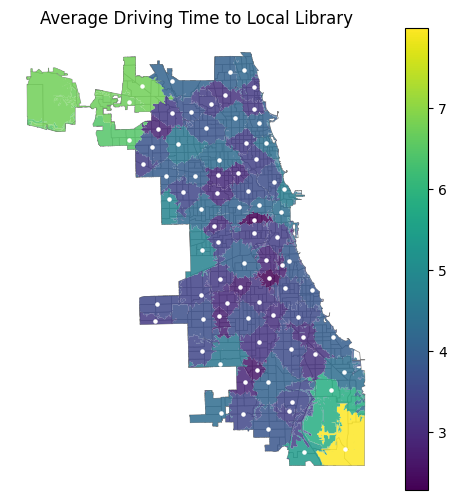

In [92]:
allAvgDrivingTime = gpd.clip(allAvgDrivingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
allAvgDrivingTime.plot(column='Average Driving Time (Minutes)', legend=True, ax=base, alpha = .85)
branchLocsOnly.plot(ax=base, marker='o', color='white', markersize=5)
ax.axis('off')
ax.set_title('Average Driving Time to Local Library', fontdict={'fontsize': '12', 'fontweight' : '3'})

The following function allows you to plot average walking time by demographic. Average walking time by demographic is calculated by finding the average walking time to libraries but only considering the population of one demographic at a time.

In [93]:
def heatMapAvgWalkingByDemographic(dfWithWalkingTimes, columnName, basePlot, baseType):
    '''for neighborhoods: this function plots average walking to the nearest library by demographic
    dfWithWalkingTimes = the dataframe of walking time by demographic
    columnName = string of the column name from dfWithWalkingTimes with the demographic of interest
    basePlot = either censusTracts or chicagoCommunityAreas
    baseType = string of the chosen underlay'''
    dfWithWalkingTimes = gpd.clip(dfWithWalkingTimes,combinedCensusTracts)
    fig, ax = plt.subplots(1, figsize=(6, 6))
    base = basePlot.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
    dfWithWalkingTimes.plot(column=columnName, legend=True, ax=base, alpha = .85)
    ax.axis('off')
    branchLocsOnly.plot(ax=base, marker='o', color='white', markersize=5)
    ax.set_title('Average ' + columnName + ' Communities in Minutes', fontdict={'fontsize': '12', 'fontweight' : '3'})

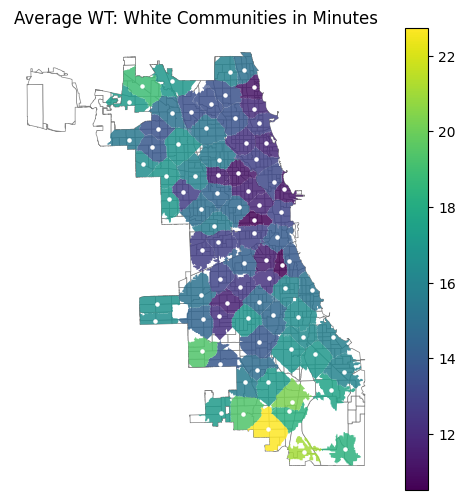

In [94]:
heatMapAvgWalkingByDemographic(demoAvgWalkingTime, 'WT: White', censusTracts, 'Census Tracts')

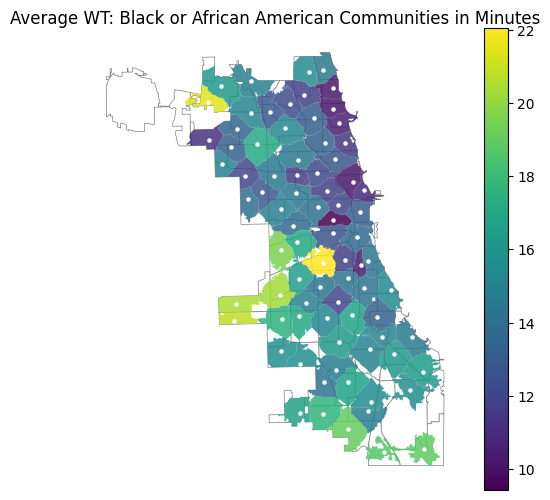

In [96]:
heatMapAvgWalkingByDemographic(demoAvgWalkingTime, 'WT: Black or African American', chicagoCommunityAreas, 'Chicago Community Areas')

The following function plots the outlines of neighborhoods based on the chosen travel type. 

In [97]:
def plotNeighborhoods(neighborhoodsFile, transportType, basePlot, baseType):
    '''for neighborhoods: this function plots neighborhood boundaries
    neighborhoodsFile = the dataframe with neighborhood boundaries for chosen transit time
    transportType = string of the column name from dfWithWalkingTimes with the demographic of interest
    basePlot = either censusTracts or chicagoCommunityAreas
    baseType = string of the chosen underlay'''
    neighborhoodsFile = gpd.clip(neighborhoodsFile,combinedCensusTracts)
    fig, ax = plt.subplots(1, figsize=(6, 6))
    base = basePlot.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
    neighborhoodsFile.plot(ax=base, alpha = .15, color='mediumpurple')
    neighborhoodsFile.boundary.plot(ax=base, edgecolor='mediumpurple', linewidth = .5, alpha = .8)
    branchLocsOnly.plot(ax=base, marker='o', color='maroon', markersize=5)
    ax.axis('off')
    ax.set_title('Library Neighborhoods By '+ transportType + '\nOverlaid on ' + baseType, fontdict={'fontsize': '12', 'fontweight' : '3'})

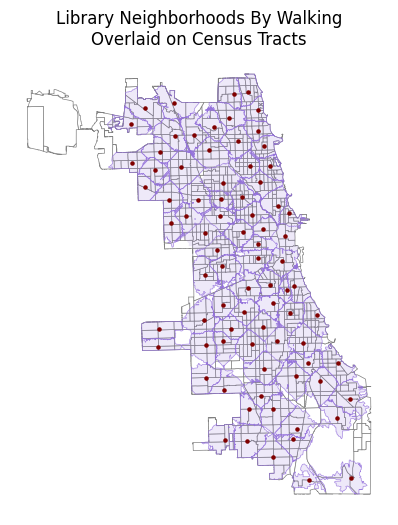

In [98]:
plotNeighborhoods(walkingNeighborhoods, 'Walking', censusTracts, 'Census Tracts')

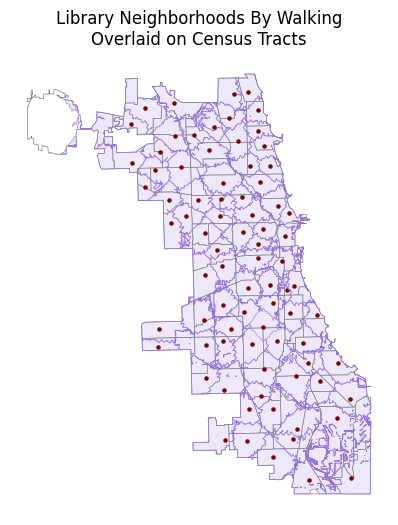

In [99]:
plotNeighborhoods(allAvgCyclingTime, 'Walking', chicagoCommunityAreas, 'Census Tracts')